In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Conv2D, Flatten, Dropout, MaxPooling2D,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

training_size = 300000
batch_size = 128
epochs = 15
IMG_HEIGHT = 60
IMG_WIDTH = 28

CLASS_NAMES = np.array([])
for i in range(10):
    CLASS_NAMES =np.append(CLASS_NAMES,chr(ord("0")+i))
for i in range(26):
    CLASS_NAMES = np.append(CLASS_NAMES,chr(ord("A")+i))

#training dir / validation dir
train_dir_data01 = os.path.abspath(os.getcwd())+"\\train\\data01_train\\"
val_dir_data01 = os.path.abspath(os.getcwd())+"\\dev\\data01_dev"
num_train_data01 = len(os.listdir(train_dir_data01))
num_val_data01 = len(os.listdir(val_dir_data01))
print("Train data count: " + str(num_train_data01))
print("Validation data count: " + str(num_val_data01))

#store filename and label to a Dataframe 
import pandas as pd
data = pd.read_csv("train\\data01_train.csv")
for i in range(len(data)):
    data.iloc[i,1] = list(data.iloc[i,1])

#maybe there's an easier way to separate labels??
arr = np.zeros([6,50000],str)
for j in range(6):
    for i in range(len(data)):
        arr[j][i] = data.iloc[i,1][j]
data = data.drop(columns= ["code"]).join(pd.DataFrame(arr.transpose(),columns = ["code0","code1",'code2','code3','code4','code5']))

data

Train data count: 50000
Validation data count: 10000


,filename,code0,code1,code2,code3,code4,code5
0,000000.jpg,Z,3,2,7,0,D
1,000001.jpg,V,M,Y,X,E,8
2,000002.jpg,J,Z,K,W,V,U
3,000003.jpg,X,9,I,2,7,H
4,000004.jpg,H,5,X,G,R,2
...,...,...,...,...,...,...,...
49995,049995.jpg,3,Y,F,I,S,E
49996,049996.jpg,4,S,U,T,F,7
49997,049997.jpg,C,Y,U,N,0,9
49998,049998.jpg,K,C,D,8,I,O


Using tf method fetch data which is faster

In [3]:
#show case concatenate
a = tf.data.Dataset.from_tensor_slices([[True,False],[False,True]])
b = tf.data.Dataset.from_tensor_slices([[True,True],[False,False]])
c = a.concatenate(b)
for i in c.take(4):
    print(i)

tf.Tensor([ True False], shape=(2,), dtype=bool)
tf.Tensor([False  True], shape=(2,), dtype=bool)
tf.Tensor([ True  True], shape=(2,), dtype=bool)
tf.Tensor([False False], shape=(2,), dtype=bool)


In [16]:
#function for prerpoccess
def parse_label(strIN):
    return (strIN==CLASS_NAMES)

def cropimage_operation(fn,imxstart):
    a = tf.io.read_file((fn))
        #crop to [60,30,3]
    img = tf.image.decode_and_crop_jpeg(a,[0,imxstart,IMG_HEIGHT,IMG_WIDTH],channels=3)
    return tf.expand_dims(img,0)



In [17]:
#no crop function
def parse_label(strIN):
    return (strIN==CLASS_NAMES).astype(float)
def readimg_to_tensor(fn):
    a = tf.io.read_file((fn))
        #crop to [60,30,3]
    img = tf.io.decode_jpeg(a)
    return img

In [18]:
#to one hot
for i in range(6):
    data.iloc[:,i+1] = data.iloc[:,i+1].map(parse_label)

In [5]:
data

,filename,code0,code1,code2,code3,code4,code5
0,000000.jpg,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, ...","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,000001.jpg,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, ..."
2,000002.jpg,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,000003.jpg,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,000004.jpg,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
...,...,...,...,...,...,...,...
49995,049995.jpg,"[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
49996,049996.jpg,"[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, ..."
49997,049997.jpg,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
49998,049998.jpg,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [19]:
TL = tf.convert_to_tensor(list(data.iloc[:,1].values))
TL2 = tf.convert_to_tensor(list(data.iloc[:,2].values))
TL3 = tf.convert_to_tensor(list(data.iloc[:,3].values))
TL4 = tf.convert_to_tensor(list(data.iloc[:,4].values))
TL5 = tf.convert_to_tensor(list(data.iloc[:,5].values))
TL6 = tf.convert_to_tensor(list(data.iloc[:,6].values))


In [46]:
TL

<tf.Tensor: shape=(50000, 36), dtype=float64, numpy=
array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])>

In [20]:
#no crop
train_dir = tf.data.Dataset.list_files(train_dir_data01+'*.jpg',shuffle=False) 
train_data = train_dir.map(lambda x: readimg_to_tensor(x))
train_label = tf.data.Dataset.from_tensor_slices((TL,TL2,TL3,TL4,TL5,TL6))
train_data01=tf.data.Dataset.zip((train_data,train_label))

In [21]:
#validation data no crop
val_dir = tf.data.Dataset.list_files(val_dir_data01+'*.jpg',shuffle=False) 
val_data01 = val_dir.map(lambda x: readimg_to_tensor(x))

In [5]:
#crop all words in the images and label all

for i in range(6):
    label = tf.data.Dataset.from_tensor_slices(data.iloc[:,i+1])
    TL= label.map(parse_label)
    train_dir = tf.data.Dataset.list_files(train_dir_data01+'*.jpg',shuffle=False) 
    TD = train_dir.map(lambda x: cropimage_operation(x,i*IMG_WIDTH))
    train_data = tf.data.Dataset.zip((TD,TL))   
    if i!=0:
        train_data01 = train_data01.concatenate(train_data)    
    else:
        train_data01 = train_data

In [22]:
#number of element
num_elements = tf.data.experimental.cardinality(train_data01).numpy()
num_elements

50000

In [6]:
def prep_data(dataset):
    dataprep = dataset.shuffle(num_elements,reshuffle_each_iteration=True)
    return dataprep
    
def show_batch(image_batchh, label_batchh):
  plt.figure(figsize=(14,10))
  for n in range(len(image_batchh)):
      ax = plt.subplot(5,5,n+1)
      plt.imshow(image_batchh[n][0])
      plt.title(CLASS_NAMES[np.where(label_batchh[n][0])])
      plt.axis('image')

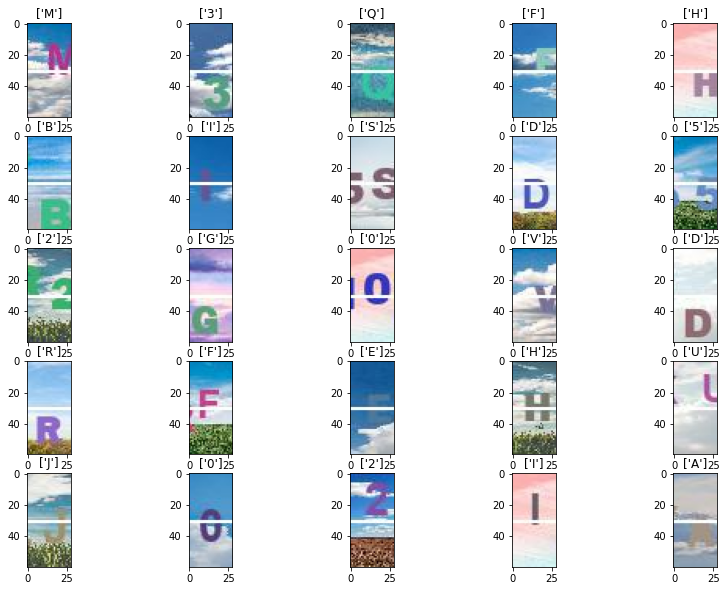

In [7]:
#only show batch when data is small
datapreped = prep_data(train_data01)
image_batch, label_batch = next(iter(datapreped.batch(25)))
show_batch(image_batch,label_batch)

In [23]:
#railway model
print("Creating CNN model...")
inn = Input((60, 200, 3))
out = inn
out = Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu')(out)
out = Conv2D(filters=32, kernel_size=(3, 3), activation='relu')(out)
out = BatchNormalization()(out)
out = MaxPooling2D(pool_size=(2, 2))(out)
out = Dropout(0.3)(out)
out = Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu')(out)
out = Conv2D(filters=64, kernel_size=(3, 3), activation='relu')(out)
out = BatchNormalization()(out)
out = MaxPooling2D(pool_size=(2, 2))(out)
out = Dropout(0.3)(out)
out = Conv2D(filters=128, kernel_size=(3, 3), padding='same', activation='relu')(out)
out = Conv2D(filters=128, kernel_size=(3, 3), activation='relu')(out)
out = BatchNormalization()(out)
out = MaxPooling2D(pool_size=(2, 2))(out)
out = Dropout(0.3)(out)
out = Conv2D(filters=256, kernel_size=(3, 3), activation='relu')(out)
out = BatchNormalization()(out)
out = MaxPooling2D(pool_size=(2, 2))(out)
out = Flatten()(out)
sep = Dropout(0.3)(out)
dig1 = Dense(36, name='digit1', activation='softmax')(sep)
dig2 = Dense(36, name='digit2', activation='softmax')(sep)
dig3 = Dense(36, name='digit3', activation='softmax')(sep)
dig4 = Dense(36, name='digit4', activation='softmax')(sep)
dig5 = Dense(36, name='digit5', activation='softmax')(sep)
dig6 = Dense(36, name='digit6', activation='softmax')(sep)
model = tf.keras.models.Model(inputs=inn, outputs=[dig1, dig2,dig3,dig4,dig5,dig6])
model.compile(
    loss=[
        tf.keras.losses.CategoricalCrossentropy(),
        tf.keras.losses.CategoricalCrossentropy(),
        tf.keras.losses.CategoricalCrossentropy(),
        tf.keras.losses.CategoricalCrossentropy(),
        tf.keras.losses.CategoricalCrossentropy(),
        tf.keras.losses.CategoricalCrossentropy(),
    ],
    optimizer='adam', 
    metrics=['accuracy'])
model.summary()

Creating CNN model...
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 60, 200, 3)] 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 60, 200, 32)  896         input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 58, 198, 32)  9248        conv2d[0][0]                     
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 58, 198, 32)  128         conv2d_1[0][0]                   
________________________________________________________________________

In [14]:
import pydot
import graphviz

In [15]:
tf.keras.utils.plot_model(model)

Failed to import pydot. You must install pydot and graphviz for `pydotprint` to work.


In [18]:
model = Sequential([
    Conv2D(32, (3, 3), input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)), 
    Conv2D(32, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.3),
    Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu'),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.3),
    Conv2D(filters=128, kernel_size=(3, 3), padding='same', activation='relu'),
    Conv2D(filters=128, kernel_size=(3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dropout(0.3),
    Dense(36,activation="softmax")
])

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
#model.optimizer.lr=0.0001
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_32 (Conv2D)           (None, 58, 26, 32)        896       
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 58, 26, 32)        9248      
_________________________________________________________________
batch_normalization_18 (Batc (None, 58, 26, 32)        128       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 29, 13, 32)        0         
_________________________________________________________________
dropout_19 (Dropout)         (None, 29, 13, 32)        0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 29, 13, 64)        18496     
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 27, 11, 64)       

In [14]:
def split_dataset(dataset: tf.data.Dataset, validation_data_fraction: float):
    """
    Splits a dataset of type tf.data.Dataset into a training and validation dataset using given ratio. Fractions are
    rounded up to two decimal places.
    @param dataset: the input dataset to split.
    @param validation_data_fraction: the fraction of the validation data as a float between 0 and 1.
    @return: a tuple of two tf.data.Datasets as (training, validation)
    """

    validation_data_percent = round(validation_data_fraction * 100)
    if not (0 <= validation_data_percent <= 100):
        raise ValueError("validation data fraction must be ∈ [0,1]")

    dataset = dataset.enumerate()
    train_dataset = dataset.filter(lambda f, data: f % 100 > validation_data_percent)
    validation_dataset = dataset.filter(lambda f, data: f % 100 <= validation_data_percent)

    # remove enumeration
    train_dataset = train_dataset.map(lambda f, data: data)
    validation_dataset = validation_dataset.map(lambda f, data: data)

    return train_dataset, validation_dataset

In [16]:
train_data_fit , val_data_fit = split_dataset(datapreped,0.1)

In [24]:
epochs=15
batch_size=128
big_batch_size=5000

In [25]:
for img , lb in iter(train_data01.batch(big_batch_size)):
    
    history = model.fit(
       img,
       lb,
       batch_size=batch_size,
       validation_split=0.1,
       shuffle=True,
       use_multiprocessing=True,
       steps_per_epoch=big_batch_size // batch_size, 
       epochs=epochs,
       verbose=2
    )


Epoch 1/15


UnknownError:  Failed to get convolution algorithm. This is probably because cuDNN failed to initialize, so try looking to see if a warning log message was printed above.
	 [[node model/conv2d/Conv2D (defined at <ipython-input-25-86e2fe34c45a>:12) ]] [Op:__inference_train_function_4141]

Function call stack:
train_function


In [109]:
model.save('data01_20200514.h5')

In [58]:
def predict_sigle_img(imgdir):
    imgtest = plt.imread(imgdir)
    imgtest2 = np.expand_dims(imgtest, axis=0)
    result = model(imgtest2)
    PredChr=''
    for i in range(6):
        PredChr+= (
            CLASS_NAMES[
            np.where(result[i].numpy()[0] == result[i].numpy()[0].max())[0][0]
            ])
    
    print("Predict character: "+ PredChr)
    plt.imshow(imgtest)
    return model(imgtest2)

In [77]:
filename = str(np.random.randint(50000))+'.jpg'

Predict character: 7DB6BX


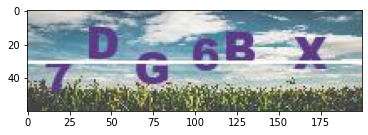

In [108]:
filename = '%06d'%np.random.randint(50000)+'.jpg'
result = predict_sigle_img(train_dir_data01+filename)

In [96]:
#predict
val_result=[]
for i in range(2):
    valimg = next(iter(val_data01.batch(5000)))
    val_result += model.predict(
        valimg,
        batch_size=1000,
        use_multiprocessing=True)

KeyboardInterrupt: 

In [46]:
CLASS_NAMES[np.where(result[1].numpy()[0] == result[1].numpy()[0].max())[0][0]]

'Y'

 # old

In [ ]:
for image, label in train_data01:
    image = cropimage_operation(image)
    print("Image shape: ", image.numpy().shape)
    print("Label: ", label.numpy())
def prepare_for_training(ds, cache=True, shuffle_buffer_size=1000):
  # This is a small dataset, only load it once, and keep it in memory.
  # use `.cache(filename)` to cache preprocessing work for datasets that don't
  # fit in memory.
  if cache:
    if isinstance(cache, str):
      ds = ds.cache(cache)
    else:
      ds = ds.cache()

  ds = ds.shuffle(buffer_size=shuffle_buffer_size)

  # Repeat forever
  ds = ds.repeat()

  ds = ds.map(lambda x: cropimage(x[0]))

  
  return ds
train_ds = prepare_for_training(train_data01)

image_batch, label_batch = next(iter(train_ds))